# 01. Introduction to Deep Learning. Basic Models

Deep learning unlocks:

- [Multimodal learning](https://www.v7labs.com/blog/multimodal-deep-learning-guide)
- Multi task learning
- Self supervised learning
- Self learning - as a concept
- Transfer learning
- Domain knowledge transfer
- Train an algorithm on synthetic data and then use it on real life data
- Image recognition - YEII!
- LLM (Large Language Models) for many languages (ChatGPT Llama etc.)


The process of training the NNs is incredibly important

Types of data we will see:
- Unstructured data:
    - Images
    - Text
    
etc.
    

Reinforcement Learning -> The model becomes an [**agent**](https://zapier.com/blog/ai-agent/) that can change the enviornment that it is being trained it. 

### Vanishing gradient problem

Example:

We inspect layer 14 to see what the weights are and check if the network is being trained. We see that the weights do not change. This can be due to [Vanishing gradient problem](https://en.wikipedia.org/wiki/Vanishing_gradient_problem):

**_Vanishing gradient problem:_** In machine learning, the vanishing gradient problem is encountered when training artificial neural networks with gradient-based learning methods and backpropagation. In such methods, during each iteration of training each of the neural networks weights receives an update proportional to the partial derivative of the error function with respect to the current weight.[1] The problem is that in some cases, the gradient will be vanishingly small, effectively preventing the weight from changing its value.[1] In the worst case, this may completely stop the neural network from further training.[1] As one example of the problem cause, traditional activation functions such as the hyperbolic tangent function have gradients in the range (0,1], and backpropagation computes gradients by the chain rule. This has the effect of multiplying n of these small numbers to compute gradients of the early layers in an n-layer network, meaning that the gradient (error signal) decreases exponentially with n while the early layers train very slowly.

**Further explanation:** In the example we use backprogation which starts from the last layer and moves back to the first layer (hence BACK-propagation). If we use this hyperbolic tangent function:

<img src="images/hyperbolic-tangent-function.png" alt="Hyperbolic tangent function" style="width:400px;"/>

We see that the Range is [0;1] and due to the chain rule of derivatives the gradient will become smaller and smaller since we keep multiplying by a number that $\in$ [0,1]. Since we do it from the back to the front the last layers will be chaning but the first ones in the worst case might not at all.

### Quantization

Techniques for faster model training:
- [Quantization](https://www.youtube.com/watch?v=v1oHf1KV6kM) 
    - Quantization is the process of mapping continuous infinite values to a smaller set of discrete finite values. In the context of simulation and embedded computing, it is about approximating real-world values with a digital representation that introduces limits on the precision and range of a value.
    - Example: converting float weights of the NN to integers. Effects:
        - <span style="color:green;">Reduces the memory the NN takes</span>
        - <span style="color:green;">Faster inference</span>
        - <span style="color:red;">Less accuracy</span>
        
    - 2 types of Quantization:
        - Post model Quantization - Train the model then reduct the weights
        - Quantization Aware Training:
            - Train. Reduce the weights at some point. Repeat. ( Explanation from the video above)
            - [Link](https://towardsdatascience.com/inside-quantization-aware-training-4f91c8837ead) - As we move to a lower precision from float, we generally notice a significant accuracy drop as this is a lossy process. This loss can be minimized with the help of quant-aware training. So basically, quant-aware training simulates low precision behavior in the forward pass, while the backward pass remains the same. This induces some quantization error which is accumulated in the total loss of the model and hence the optimizer tries to reduce it by adjusting the parameters accordingly. This makes our parameters more robust to quantization making our process almost lossless.

### Mistake in ROC results in ML course note

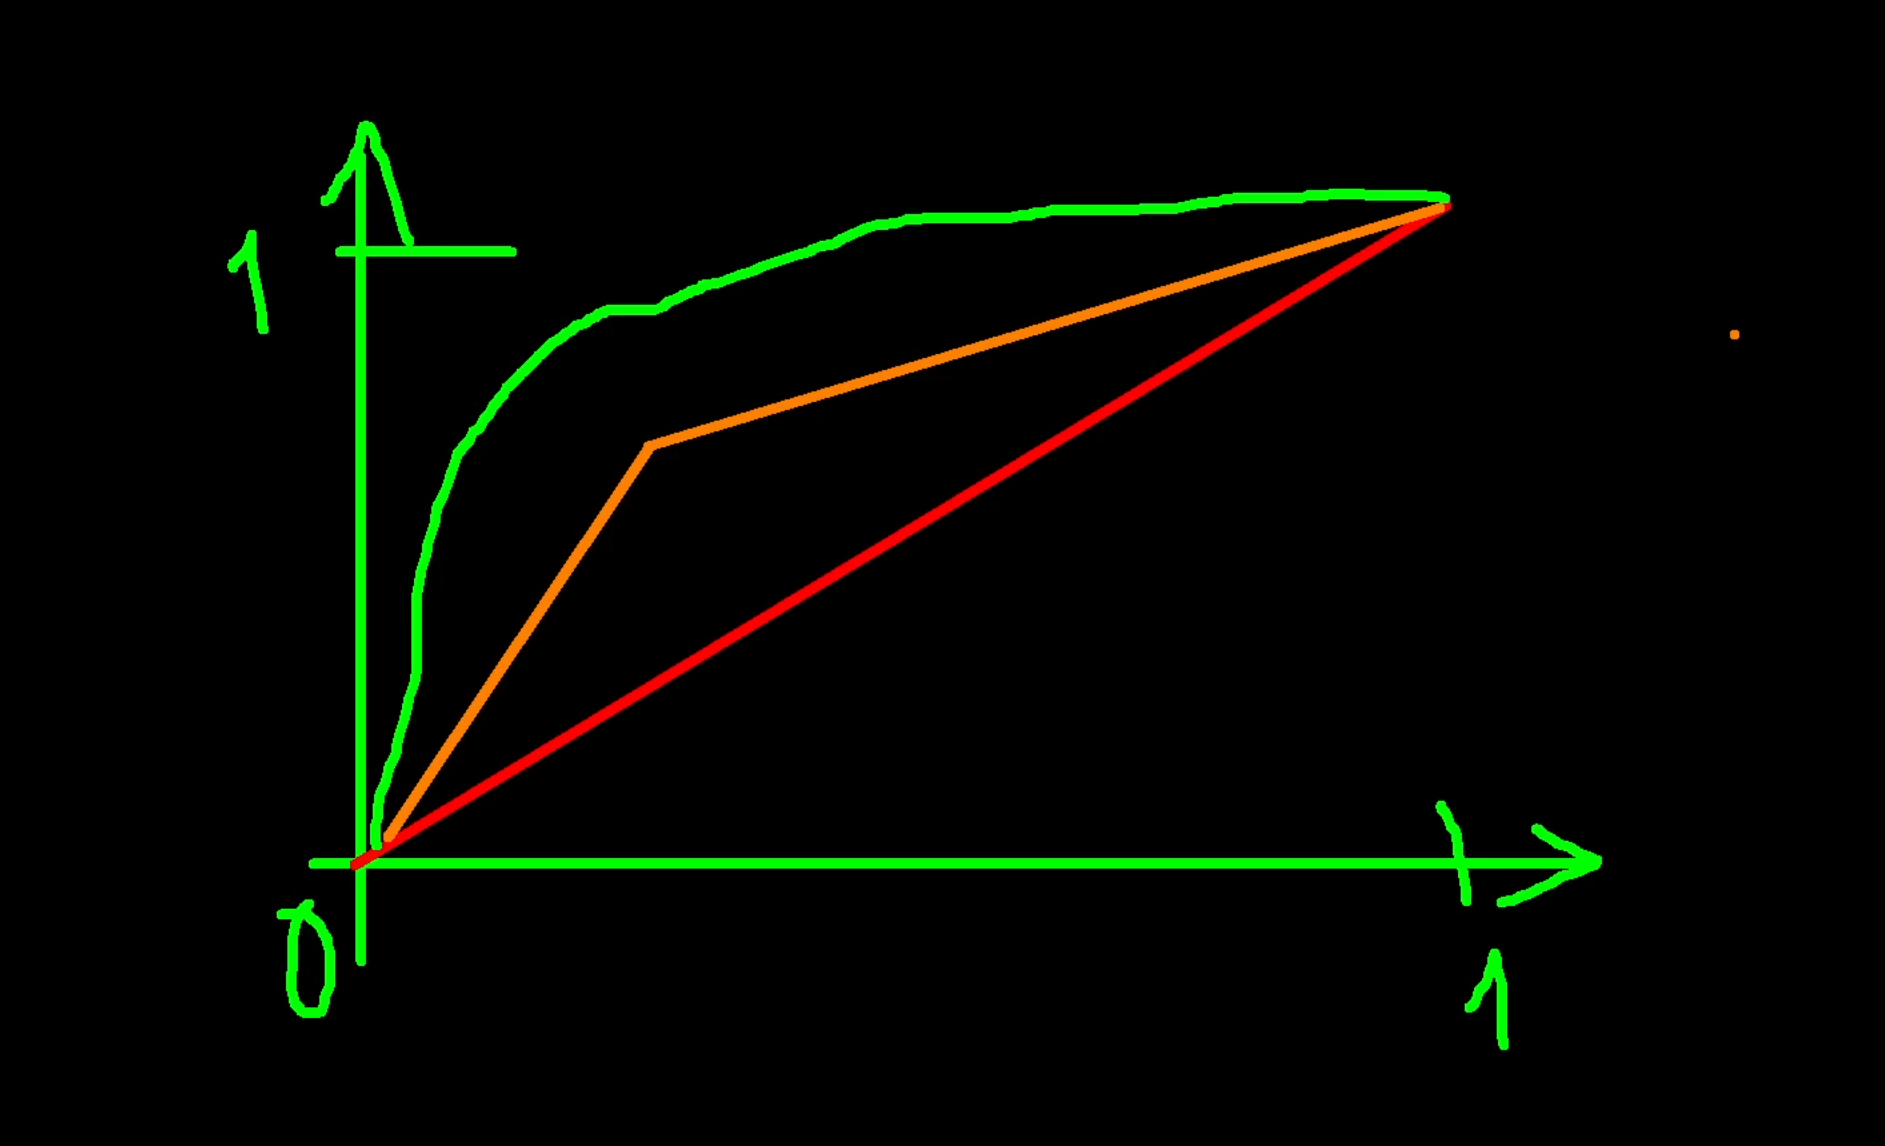
[ROC problem example in StackOverflow](https://stackoverflow.com/questions/42916137/why-does-my-roc-curve-look-like-a-v)


Summary: We are not using a Probabilistic classifier that the ROC curve is meant to be used for. Example results of prediction it is supposed to be used on: [0.123, 0.445, 0,67 etc..] not [0, 1, 0 , 1, 1]

We can think of the ROC curve being build as all the different thresholds that we can choose to classify 0 or 1 FROM THOSE proababilistic results 0.123, 0.664 etc. Think what will happen if we don't have the results as floats but just 0s and 1s. [Here is the GOAT StatQuest explaining it in details](https://www.youtube.com/watch?v=4jRBRDbJemM). 

To understand why its a V shape or why there is 1 point other than (0,0) and (1,1) think of it as thresholds between the UNIQUE proba values. There will be only 1 available threshold between all the available UNIQUE!! results which are [0, 1]. So we have a V shape ROC curve.

**Important:** Don't use ROC curve on NON PROBABILISTIC CLASSIFIERS

## [Pytorch vs Tensorflow](https://medium.com/@Learnbay_official/pytorch-vs-tensorflow-major-difference-among-deep-learning-cea7bf35ad11)

Pytorch - requires a lot more code to do the same thing compared to TF

We will be using mainly Tensorflow (Keras POG)

In TF we can define a loss function - giving it a specific task so to say. With great power comes great responsibility so be careful how you define it.

In scikit-learn's NN we don't use Learning Curves. With TF they are incredibly important to understand how the training is going.

Images - Pixels that are close together have a similar context aka Convolution (a way of feature extraction)

NLP - Words in a text - [Markov's chain](https://www.geeksforgeeks.org/markov-chains-in-nlp/)

We can analyze a corpus of text and generate a Markov chain with probabilites of jumping from one word to the next based on the corpus. This can be used for text generation, speech recognition, and sentiment analysis.

## Install Tensorflow

Tensorflow doesn't work well with other libraries installed around it (in the same [venv](https://docs.python.org/3/library/venv.html))
1. Create new venv
2. conda/pip install tensorflow - depending if you use conda or venv

Depending on yor GPU it can happen very easily or not happen at all. I have NVIDIA RTX 2060 Super and it worked easily.

I talked with a Team Lead of an ML team from the idustry for tips on getting better at ML and one of the things he said was to stop working on your local machine. Get a cheap cloud machine and learn to work remotely. When you work in the industry the dataset are huge and they can't fit on a local machine. The compute power you need to train a model as well is really demanding for a local machine. This is why AI is so closely coupled with the CLOUD. Many of the job offers require Docker, Kuberneties, AWS/Azure services etc. 

In [1]:
#Check your video card (if its NVIDIA) with this

!nvidia-smi

Tue Dec 12 22:59:37 2023       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 546.33                 Driver Version: 546.33       CUDA Version: 12.3     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                     TCC/WDDM  | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA GeForce RTX 2060 ...  WDDM  | 00000000:08:00.0  On |                  N/A |
|  0%   55C    P8              19W / 184W |   1031MiB /  8192MiB |     22%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

### How to install 2.15 Tensorflow on windows with WSL2:

[What is WSL2?](https://learn.microsoft.com/en-us/windows/wsl/install)
```
Developers can access the power of both Windows and Linux at the same time on a Windows machine. The Windows Subsystem for Linux (WSL) lets developers install a Linux distribution (such as Ubuntu, OpenSUSE, Kali, Debian, Arch Linux, etc) and use Linux applications, utilities, and Bash command-line tools directly on Windows, unmodified, without the overhead of a traditional virtual machine or dualboot setup.
```

Make sure you have enough space on C: (10-20GB)

#### How to install and run WSL:
1. Make sure you have CPU virtualization in your BIOS
2. Open PowerShell and execute:
   ```
   wsl --install
   ```
3. *This will install Ubutu by default
4.  Write in the console
    ```
    wsl
    ```
5. This will open a linux terminal in the distro you just installed. Congratulations you have Linux while on Windows.

#### Steps to create a venv and intsall TF 2.15 in it
1. While still in the wsl linux distro terminal install miniconda on the linux:
   ```
   curl https://repo.anaconda.com/miniconda/Miniconda3-latest-Linux-x86_64.sh -o Miniconda3-latest-Linux-x86_64.sh
   bash Miniconda3-latest-Linux-x86_64.sh
   ```
2. Create a new venv:
   ```
   conda create -n tf python=3.11
   ```
3. Exit out of wsl with:
   ```
   exit
   ```
4. Start wsl again with:
   ```
   wsl
   ```
5. Activate the new env you created:
   ```
   conda activate tf   
   ```
6. Install tensorflow 2.15 with:
   ```
   {pip/conda} install tensorflow[and-cuda]
   ```
7. Install jupyter lab
   ```
   conda install jupyterlab
   ```

This installs the Distro and it's root folder is in C:/. I moved the distro to D: where I have 900GB with [this](https://superuser.com/a/1695880). I didn't unregister just straight up moved it and it worked, heh

## Multimodal ML lection DEV.BG 13.12.2023

Types of data: 
- text
- audio
- image
- video

temporal encoding

Holistic understanding of multiple data types - joint probabilities

Examples for image and text: Captioning, Retireval, Generation

Vision Transformer instead of CNN?

Computer Vision - Contrastive learning - usupervised representation learning

## Lecture continues

In [3]:
import tensorflow as tf

In [6]:
tf.config.list_physical_devices('GPU')

2023-12-13 22:27:29.247159: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:08:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-12-13 22:27:29.247231: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:08:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-12-13 22:27:29.247258: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:08:00.0/numa_node
Your kernel may have been built without NUMA support.


[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]